# **Importing Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Cancer_DS.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Data Preprocessing**

In [ ]:
# Check for missing values
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


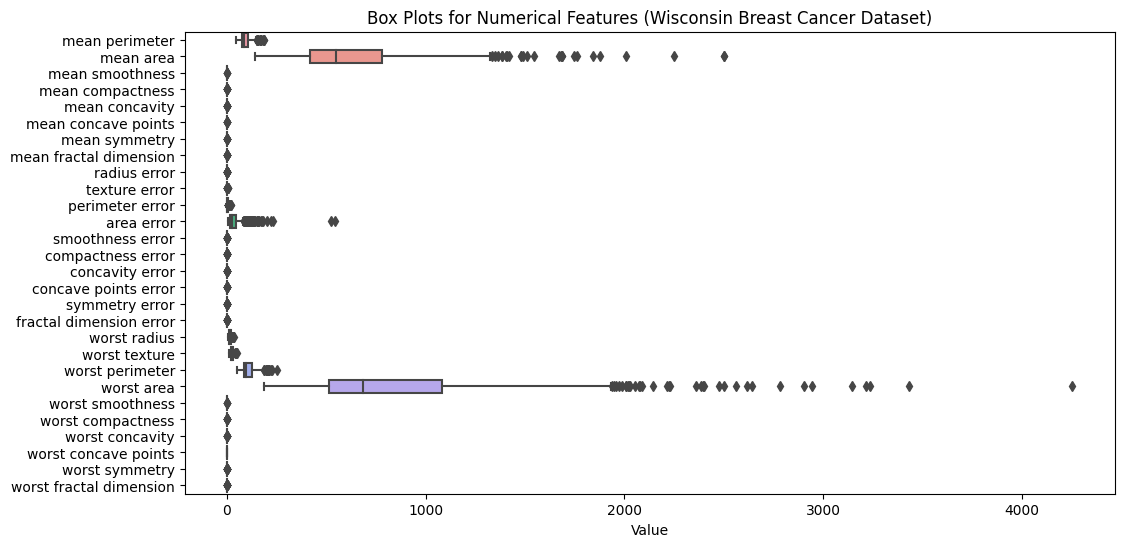

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the column names for numerical features (excluding ID and Diagnosis columns)
numerical_columns = df.columns[2:]  # Starting from the 3rd column (index 2)

# Create box plots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns], orient="h")
plt.title("Box Plots for Numerical Features (Wisconsin Breast Cancer Dataset)")
plt.xlabel("Value")
plt.show()


In [ ]:
import numpy as np
from scipy import stats

# Calculate z-scores for numerical features
z_scores = np.abs(stats.zscore(df.select_dtypes(include=['float64'])))

# Set the outlier threshold
outlier_threshold = 3  # You can adjust this threshold as needed

# Identify rows with outliers
outliers = (z_scores > outlier_threshold).any(axis=1)

# Remove outliers
df_no_outliers = df[~outliers]

# Save the cleaned data to a new CSV file
df_no_outliers.to_csv("wisconsin_breast_cancer_no_outliers.csv", index=False)



# **Balancing Data**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Define features (X) and target variable (y)
X = df.drop('diagnosis', axis=1)  # Features
y = df['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a SimpleImputer to handle missing values (NaN)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Fit and transform the training data to oversample the minority class
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_imputed, y_train)


In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate SimpleImputer with a strategy (e.g., mean, median, or most_frequent)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your features
X_train_imputed = imputer.fit_transform(X_train)

# Now, you can apply SMOTE to X_train_imputed and y_train

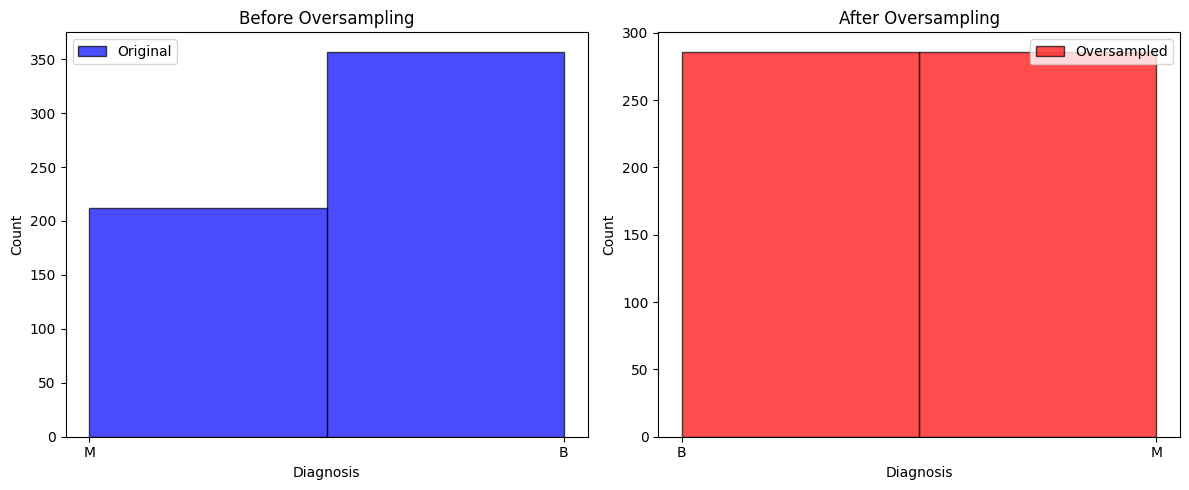

In [ ]:
# Define the target variable
y = df['diagnosis']

plt.figure(figsize=(12, 5))

# Plot before oversampling
plt.subplot(1, 2, 1)
plt.title('Before Oversampling')
plt.hist(y, bins=len(y.unique()), alpha=0.7, color='b', label='Original', edgecolor='black')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.legend()

# Plot after oversampling
plt.subplot(1, 2, 2)
plt.title('After Oversampling')
plt.hist(y_train_oversampled, bins=len(y_train_oversampled.unique()), alpha=0.7, color='r', label='Oversampled', edgecolor='black')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()



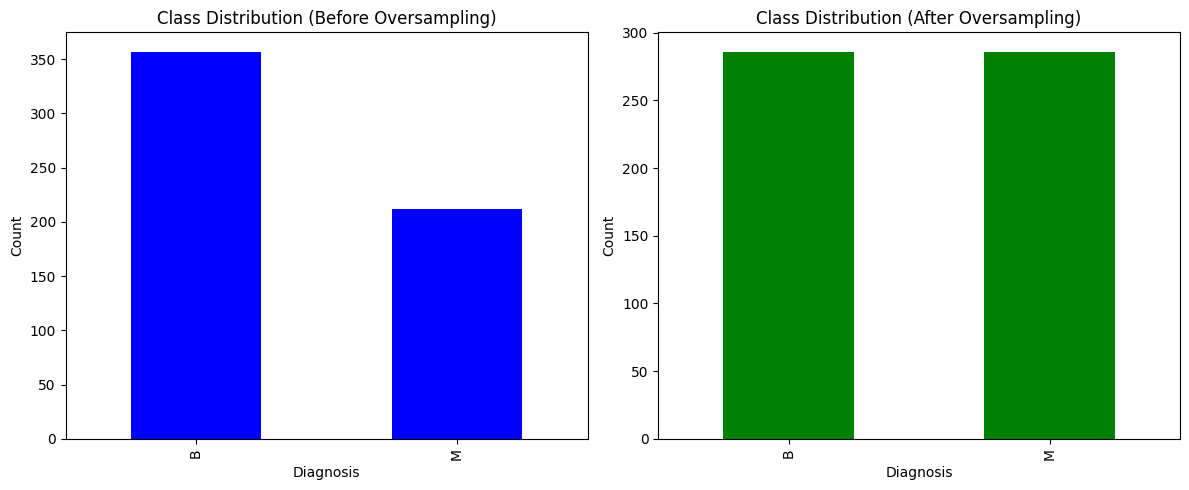

In [ ]:
# Count the occurrences of each class before oversampling
class_counts_before = y.value_counts()

# Count the occurrences of each class after oversampling
y_train_oversampled_counts = pd.Series(y_train_oversampled).value_counts()

# Plotting the bar graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
class_counts_before.plot(kind='bar', color='blue')
plt.title('Class Distribution (Before Oversampling)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
y_train_oversampled_counts.plot(kind='bar', color='green')
plt.title('Class Distribution (After Oversampling)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


# **Data Visualization**

BOX PLOT

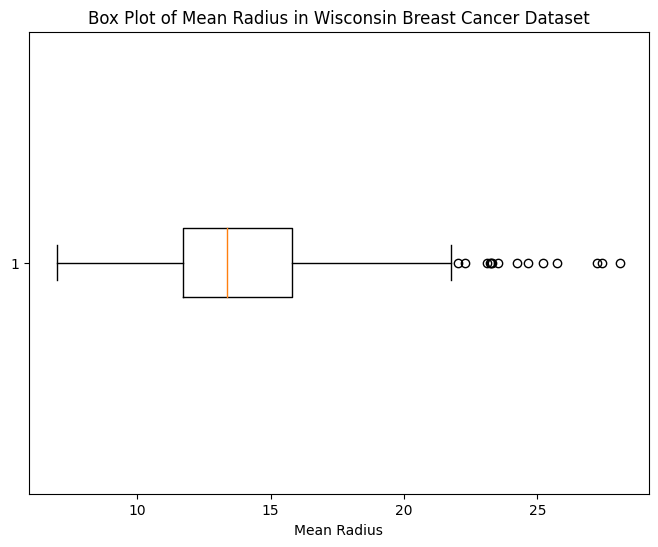

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Select the 'mean radius' feature
mean_radius = df['mean radius']

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(mean_radius, vert=False)  # 'vert=False' creates a horizontal box plot
plt.title('Box Plot of Mean Radius in Wisconsin Breast Cancer Dataset')
plt.xlabel('Mean Radius')
plt.show()




SCATTER PLOT

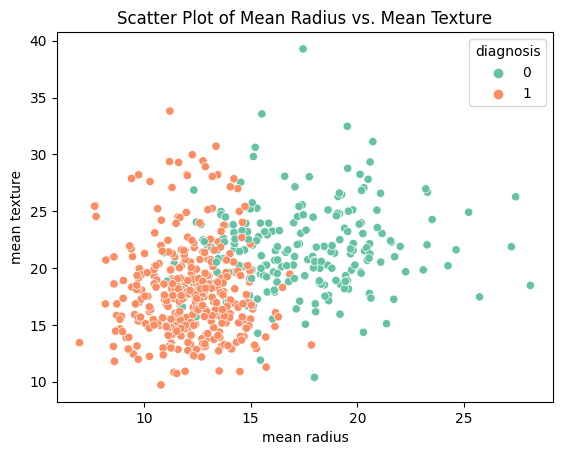

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the diagnosis column to the DataFrame
df['diagnosis'] = data.target

# Create a scatter plot
sns.scatterplot(data=df, x="mean radius", y="mean texture", hue="diagnosis", palette="Set2")
plt.title("Scatter Plot of Mean Radius vs. Mean Texture")
plt.show()


HISTOGRAM

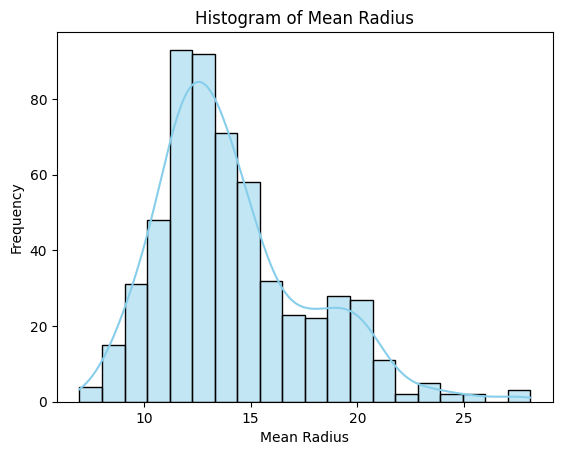

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Create a histogram
sns.histplot(df, x="mean radius", kde=True, color="skyblue", bins=20)
plt.title("Histogram of Mean Radius")
plt.xlabel("Mean Radius")
plt.ylabel("Frequency")
plt.show()



In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression

# Train your model
model = LogisticRegression()

# Save the model to a file using pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
